# Notebook per l'estrazione delle misure, il calcolo di Anova
Un due tre stella

In [1]:
#%matplotlib notebook
import numpy as np
from statsmodels.stats.multicomp import MultiComparison
#import matplotlib as mpl
#mpl.use('nbagg')

Dopo aver eseguito trec_eval per le quattro run diverse ho salvato ogni output su un file di testo. La seguente cella esegue il parsing del file andando a cercare i valori di AP, il valore MAP (ovvero la media di tutti e 50 gli AP per ogni run), il valore rprec e la precision at 10.
Ogni run corrisponde a un numero da 0 a 3, l'ordine segue quello richiesto nella consegna dell'homework.

In [2]:
#RprecALL = []
#P10ALL = []
mapALL = []
def getMeasures(file, AP, runID):
    f = open(file,'r')
    datasetLine = [x for x in f.readlines()] #list comprehension
    f.close()

    for line in datasetLine:
        split = line.split()
        if(split[1]!='all'):
            if(split[0]=='map'):
                AP.append(split[2])
            #elif(split[0]=='P_10'):
                #print("ciao")
                #p10_0.append(split[2])
            #elif(split[0]=='Rprec'):
                #print("ciao")
                #rprec_0.append(split[2])
        else: #(split[1]=='all')
            if (split[0]=='map'):# and split0[1]=='all'):
                print("Map della Run #"+ str(runID))
                print(split[2])
                mapALL.append(split[2])
            elif (split[0]=='P_10'): # and split0[1]=='all'):
                print("Precision at 10 della Run #"+ str(runID))
                print(split[2])
#                P10ALL.append(split[2])
            elif (split[0]=='Rprec'): # and split0[1]=='all'):
                print("Rprec della Run #" + str(runID))
                print(split[2])
#                RprecALL.append(split[2])
                
    print("-----------------------------------------")

In [3]:
map_0 = []
map_1 = []
map_2 = [] 
map_3 = []
#rprec = []
#p_10 = []

getMeasures('0_PS&SL_BM25.txt', map_0, 0)
getMeasures('1_PS&SL_TF-IDf.txt', map_1, 1)
getMeasures('2_PS_BM25.txt', map_2, 2)
getMeasures('3_niente_TF-IDF.txt', map_3, 3)

print(mapALL)

Map della Run #0
0.1828
Rprec della Run #0
0.2391
Precision at 10 della Run #0
0.4180
-----------------------------------------
Map della Run #1
0.1821
Rprec della Run #1
0.2391
Precision at 10 della Run #1
0.4200
-----------------------------------------
Map della Run #2
0.1857
Rprec della Run #2
0.2409
Precision at 10 della Run #2
0.4300
-----------------------------------------
Map della Run #3
0.1693
Rprec della Run #3
0.2290
Precision at 10 della Run #3
0.4060
-----------------------------------------
['0.1828', '0.1821', '0.1857', '0.1693']


In [4]:
#map_0 = []
#map_1 = []
#map_2 = [] 
#map_3 = []
#
#p_cutoff = []
#p10_0 = []
#rprec = []
#rprec_0 = []
#f = open('0_PS&SL_BM25.txt','r')
#datasetLine0 = [x for x in f.readlines()] #list comprehension
#f.close()
#
#for line in datasetLine0:
#    split0 = line.split()
#    if(split0[1]!='all'):
##    if (split0[0]=='map' and split0[1]!='all'):
#        if(split0[0]=='map'):
#            map_0.append(split0[2])
#        elif(split0[0]=='P_10'):
#            p10_0.append(split0[2])
#        elif(split0[0]=='Rprec'):
#            rprec_0.append(split0[2])
#    else: # =='all'
#        if (split0[0]=='map'):# and split0[1]=='all'):
#            print("Map della Run #0: ")
#            print(split0[2])
#        elif (split0[0]=='P_10'): # and split0[1]=='all'):
#            print("Precision at 10 della Run #0: ")
#            print(split0[2])
#            p_cutoff.append(split0[2])
#        elif (split0[0]=='Rprec'): # and split0[1]=='all'):
#            print("Rprec della Run #0: ")
#            print(split0[2])
#            rprec.append(split0[2])
#print("-----------------------------------------")
#print(p10_0)
##print(len(map_0))
#f = open('1_PS&SL_TF-IDf.txt','r')
#datasetLine1 = [x for x in f.readlines()] #list comprehension
#f.close()
#for line in datasetLine1:
#    split1 = line.split()
#    if (split1[0]=='map' and split1[1]!='all'):
#        #print(line)
#        map_1.append(split1[2])
#    if (split1[0]=='map' and split1[1]=='all'):
#        print("Map della Run #1: ")
#        print(split1[2])
#    elif (split1[0]=='P_10' and split1[1]=='all'):
#        print("Precision at 10 della Run #1: ")
#        print(split1[2])
#        p_cutoff.append(split1[2])
#    elif (split1[0]=='Rprec' and split1[1]=='all'):
#        print("Rprec della Run #1: ")
#        print(split1[2])
#        rprec.append(split1[2])
#print("-----------------------------------------")        
#f = open('2_PS_BM25.txt','r')
#datasetLine2 = [x for x in f.readlines()] #list comprehension
#f.close()
#for line in datasetLine2:
#    split2 = line.split()
#    #print(split)
#    #print(line)
#    if (split2[0]=='map' and split2[1]!='all'): #or split[0]=='reprec' or split[0]=='P_10'):
#        #print(line)
#        map_2.append(split2[2]);
#    if (split2[0]=='map' and split2[1]=='all'):
#        print("Map della Run #2: ")
#        print(split2[2])
#    elif (split2[0]=='P_10' and split2[1]=='all'):
#        print("Precision at 10 della Run #2: ")
#        print(split2[2])
#        p_cutoff.append(split2[2])
#    elif (split2[0]=='Rprec' and split2[1]=='all'):
#        print("Rprec della Run #2: ")
#        print(split2[2])
#        rprec.append(split2[2])
#print("-----------------------------------------")
#f = open('3_niente_TF-IDF.txt','r')
#datasetLine3 = [x for x in f.readlines()] #list comprehension
#f.close()
#for line in datasetLine3:
#    split3 = line.split()
#    #print(split)
#    #print(line)
#    if (split3[0]=='map'and split3[1]!='all'):
#        #print(line)
#        map_3.append(split3[2])
#    if (split3[0]=='map' and split3[1]=='all'):
#        print("Map della Run #3: ")
#        print(split3[2])
#    elif (split3[0]=='P_10' and split3[1]=='all'):
#        print("Precision at 10 della Run #3: ")
#        print(split3[2])
#        p_cutoff.append(split3[2])
#    elif (split3[0]=='Rprec' and split3[1]=='all'):
#        print("Rprec della Run #3: ")
#        print(split3[2])
#        rprec.append(split3[2])
##print(map_1)
#print("-----------------------------------------")
#matrice che sarebbe dovuta andare nell'Anova in matlab, ma py la gestisce diversamente
M = np.vstack((map_0,map_1, map_2, map_3))
print(M.T)
##Matr = M.T
##print(matr.shape)
##print(map_2)
##print(map_3)
print("-----------------------------------------")
#print("Precision at 10 =", p_cutoff)
#print("RPrec = ", rprec)

[['0.4181' '0.4163' '0.4110' '0.3349']
 ['0.0373' '0.0370' '0.0349' '0.0347']
 ['0.2185' '0.2163' '0.2198' '0.2221']
 ['0.0750' '0.0729' '0.0801' '0.1026']
 ['0.0765' '0.0768' '0.0857' '0.0702']
 ['0.0104' '0.0105' '0.0105' '0.0120']
 ['0.2657' '0.2688' '0.2688' '0.2732']
 ['0.2394' '0.2398' '0.2311' '0.1326']
 ['0.0155' '0.0162' '0.0151' '0.0204']
 ['0.2238' '0.2184' '0.2233' '0.3910']
 ['0.3065' '0.3065' '0.3038' '0.2564']
 ['0.0739' '0.0729' '0.0776' '0.0906']
 ['0.0437' '0.0432' '0.0431' '0.1594']
 ['0.4758' '0.4758' '0.4778' '0.5314']
 ['0.6838' '0.6834' '0.6682' '0.6964']
 ['0.3936' '0.3676' '0.4300' '0.2415']
 ['0.0774' '0.0774' '0.0764' '0.0767']
 ['0.4264' '0.4267' '0.4038' '0.4247']
 ['0.2703' '0.2703' '0.2657' '0.2657']
 ['0.0968' '0.0922' '0.0927' '0.0868']
 ['0.0021' '0.0021' '0.0019' '0.0022']
 ['0.1370' '0.1297' '0.1575' '0.1008']
 ['0.3783' '0.3765' '0.3752' '0.3986']
 ['0.2292' '0.2283' '0.2211' '0.2812']
 ['0.1793' '0.1814' '0.1735' '0.1737']
 ['0.0137' '0.0165' '0.01

In [5]:
#%matplotlib nbagg
import matplotlib.pyplot as plt
#x = np.empty(50)
#b = np.arange(1, 51, 1) #da 1 a 50 con passo 1
#ind = np.arange(len(x))
#np.put(x, ind, b)
##print(x)

#map_0_float = list(map(float, map_0))
#plt.plot(x,map_0_float, 'ro')
#plt.xticks(range(0, 50))
#plt.show()

In [6]:
#compute ANOVA 1 way
import scipy.stats as stats
alpha=0.05

f_stat, p_val = stats.f_oneway(map_0, map_1, map_2, map_3)

print(f_stat)
print("pval = ",p_val)
#When we say p value, we are referring to the area under the curve of a distribution.
if(p_val < alpha):
    print("Reject the null hypothesis => the differences between some of the means are statistically significant")
else:
    print("Accept the null hypothesis => sono uguali")

0.09965024788515882
pval =  0.9601256241314807
Accept the null hypothesis => sono uguali


Il test di Tukey è un metodo comune per condurre un'analisi dopo il calcolo dell'Anova 1 way. Questo test, nel nostro caso, compara tutte le possibili coppie di run e mette in evidenza le differenze, seppur minime dato che abbiamo accettato la null hypothesis, tra due medie.

Tukey's range test, named after the American mathematician John Tukey, is a common method used as post hoc analysis after one-way ANOVA. This test compares all possible pairs and we can use it to precisely identify difference between two means that's greater than the expected standard error

In [7]:
v_maps = np.concatenate([map_0, map_1, map_2, map_3])
runs=[]
for i in range (4):
    for j in range (50):
        runs.append("run"+str(i))
#print(runs)
mc = MultiComparison(v_maps.astype('float'), runs)
#result = mc.tukeyhsd()
result=mc.tukeyhsd(alpha)
#print(result)
print(mc.groupsunique)
print("reject: ", result.reject)
print("meandiffs:", result.meandiffs)
print("confint: ",result.confint)
print("std_pairs: ",result.std_pairs)
print("q_crit: ",result.q_crit)
print(result.summary())

['run0' 'run1' 'run2' 'run3']
reject:  [False False False False False False]
meandiffs: [-0.000636  0.002882 -0.01348   0.003518 -0.012844 -0.016362]
confint:  [[-0.08511753  0.08384553]
 [-0.08159953  0.08736353]
 [-0.09796153  0.07100153]
 [-0.08096353  0.08799953]
 [-0.09732553  0.07163753]
 [-0.10084353  0.06811953]]
std_pairs:  [0.02305267 0.02305267 0.02305267 0.02305267 0.02305267 0.02305267]
q_crit:  3.6647169573500507
Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower  upper  reject
--------------------------------------------
 run0   run1  -0.0006  -0.0851 0.0838 False 
 run0   run2   0.0029  -0.0816 0.0874 False 
 run0   run3  -0.0135   -0.098 0.071  False 
 run1   run2   0.0035   -0.081 0.088  False 
 run1   run3  -0.0128  -0.0973 0.0716 False 
 run2   run3  -0.0164  -0.1008 0.0681 False 
--------------------------------------------


halfwidths (margine d'errore):  [0.04224076 0.04224076 0.04224076 0.04224076]


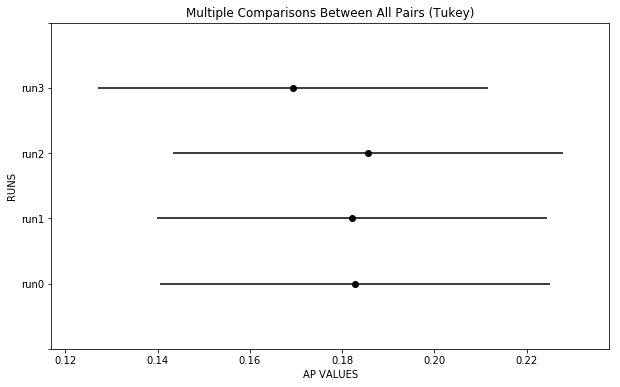

In [8]:
##questa cella va runnata due volte perchè plotti

result.plot_simultaneous(xlabel="AP VALUES",ylabel="RUNS")    # Plot group confidence intervals
#print(result.meandiffs)
print("halfwidths (margine d'errore): ",result.halfwidths)
#print(result.summary())

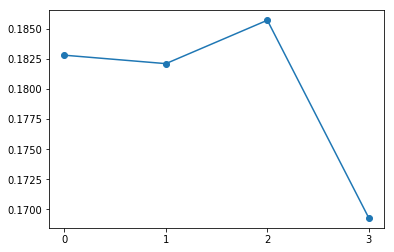

In [9]:
#plot dei 4 valori di MAP (map_all) 
#p_cutoff = list(map(float, p_cutoff))
mapALL = list(map(float, mapALL))
#list(map(int, results))

plt.plot([0,1,2,3],mapALL, marker='o')
plt.xticks(range(0, 4))
plt.show()

#plt.bar([0,1,2,3],p_cutoff)
#plt.show()

50
[351. 352. 353. 354. 355. 356. 357. 358. 359. 360. 361. 362. 363. 364.
 365. 366. 367. 368. 369. 370. 371. 372. 373. 374. 375. 376. 377. 378.
 379. 380. 381. 382. 383. 384. 385. 386. 387. 388. 389. 390. 391. 392.
 393. 394. 395. 396. 397. 398. 399. 400.]


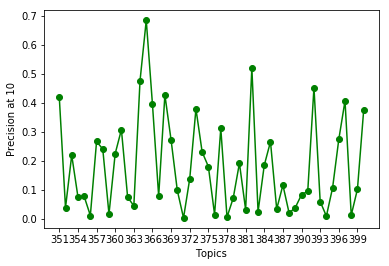

50
[351. 352. 353. 354. 355. 356. 357. 358. 359. 360. 361. 362. 363. 364.
 365. 366. 367. 368. 369. 370. 371. 372. 373. 374. 375. 376. 377. 378.
 379. 380. 381. 382. 383. 384. 385. 386. 387. 388. 389. 390. 391. 392.
 393. 394. 395. 396. 397. 398. 399. 400.]


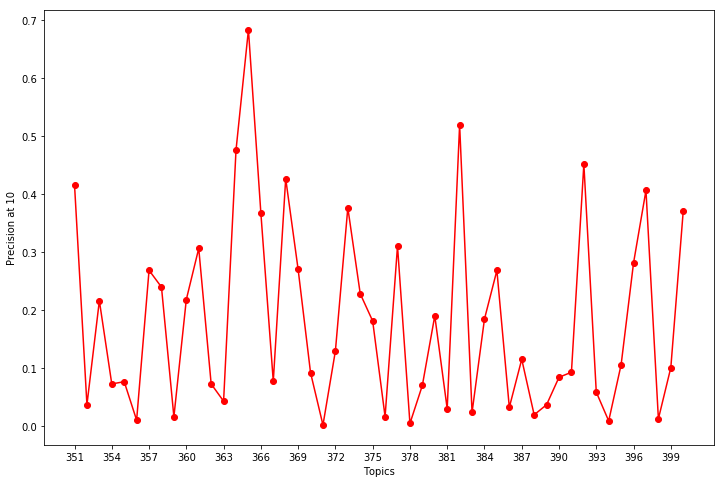

50
[351. 352. 353. 354. 355. 356. 357. 358. 359. 360. 361. 362. 363. 364.
 365. 366. 367. 368. 369. 370. 371. 372. 373. 374. 375. 376. 377. 378.
 379. 380. 381. 382. 383. 384. 385. 386. 387. 388. 389. 390. 391. 392.
 393. 394. 395. 396. 397. 398. 399. 400.]


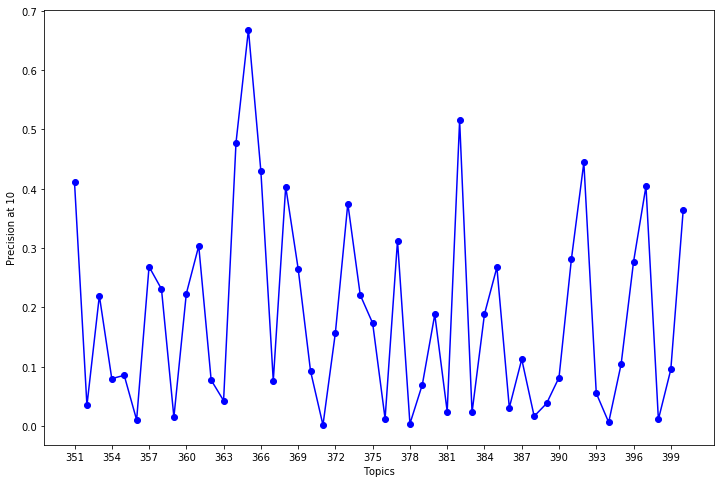

50
[351. 352. 353. 354. 355. 356. 357. 358. 359. 360. 361. 362. 363. 364.
 365. 366. 367. 368. 369. 370. 371. 372. 373. 374. 375. 376. 377. 378.
 379. 380. 381. 382. 383. 384. 385. 386. 387. 388. 389. 390. 391. 392.
 393. 394. 395. 396. 397. 398. 399. 400.]


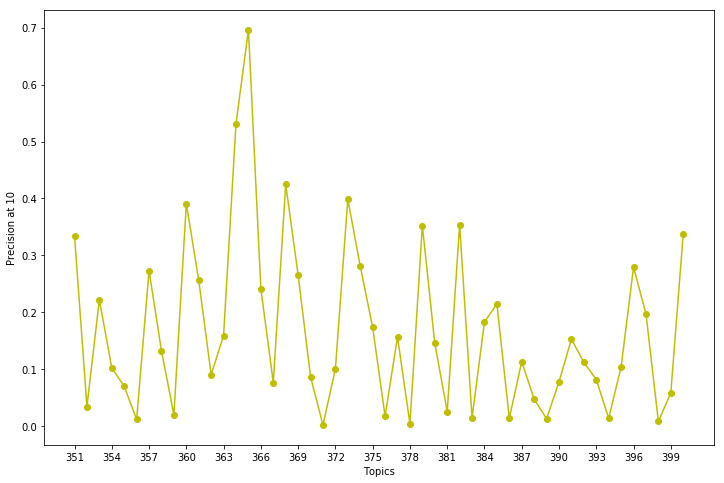

In [10]:
#plot della p_10 per ogni run, per ogni topic
#print(map_0)
#print(map_1)
#print(map_2)
#print(map_3)

#run0
print(len(map_0))
x = np.empty(50)
b = np.arange(351, 401, 1) #da 1 a 50 con passo 1
ind = np.arange(len(x))
np.put(x, ind, b)
print(x)

map_0_float = list(map(float, map_0))
#plt.plot(x,p10_0_float, 'ro')
plt.plot(x,map_0_float, marker='o', color="g")
plt.xticks(range(351, 400, 3))
plt.xlabel("Topics")
plt.ylabel("Precision at 10")
plt.rcParams["figure.figsize"]=[12.0,8.0]
plt.show()


#run1
print(len(map_1))
x = np.empty(50)
b = np.arange(351, 401, 1) #da 1 a 50 con passo 1
ind = np.arange(len(x))
np.put(x, ind, b)
print(x)

map_1_float = list(map(float, map_1))
#plt.plot(x,p10_0_float, 'ro')
plt.plot(x,map_1_float, marker='o', color="r")
plt.xticks(range(351, 400, 3))
plt.xlabel("Topics")
plt.ylabel("Precision at 10")
plt.rcParams["figure.figsize"]=[12.0,8.0]
plt.show()


#run2
print(len(map_2))
x = np.empty(50)
b = np.arange(351, 401, 1) #da 1 a 50 con passo 1
ind = np.arange(len(x))
np.put(x, ind, b)
print(x)

map_2_float = list(map(float, map_2))
#plt.plot(x,p10_0_float, 'ro')
plt.plot(x,map_2_float, marker='o', color="b")
plt.xticks(range(351, 400, 3))
plt.xlabel("Topics")
plt.ylabel("Precision at 10")
plt.rcParams["figure.figsize"]=[12.0,8.0]
plt.show()


#run3
print(len(map_3))
x = np.empty(50)
b = np.arange(351, 401, 1) #da 1 a 50 con passo 1
ind = np.arange(len(x))
np.put(x, ind, b)
print(x)

map_3_float = list(map(float, map_3))
#plt.plot(x,p10_0_float, 'ro')
plt.plot(x,map_3_float, marker='o', color="y")
plt.xticks(range(351, 400, 3))
plt.xlabel("Topics")
plt.ylabel("Precision at 10")
plt.rcParams["figure.figsize"]=[12.0,8.0]
plt.show()

#plt.bar(x,p10_0_float)

In [11]:

#plt.figure()
#fig1, ax1 = plt.subplots()
#ax1.set_title('Prova')
#ax1.boxplot(result.confint)